In [169]:
import pandas as pd
import seaborn as sns
import zipcodes
import numpy as np

In [170]:
charge_point = pd.read_csv("State_wise_data/alt_fuel_stations (Dec 13 2019)-2.csv")

In [171]:
charge_point = charge_point[charge_point["EV Network"] != 'Tesla']
charge_point = charge_point[charge_point["EV Network"] != 'Tesla Destination']

In [172]:
california_zip = [x for x in range(90000,100000)]

In [1]:
california_original_zip = []
flag = 0
for x in california_zip:
    k = zipcodes.matching(str(x))
    flag = flag + 1
    print(flag)
    if len(k) > 0:
        if k[0]['state'] == 'CA':
            california_original_zip.append(x)

In [174]:
california_cp_1 = charge_point.loc[charge_point["ZIP"].isin(california_original_zip)]

In [175]:
aggregations = {
    "EV Level2 EVSE Num": "sum",
    "EV DC Fast Count": "sum"
}

california_ev_zip = california_cp_1.groupby("ZIP").aggregate(aggregations)
california_ev_zip

,EV Level2 EVSE Num,EV DC Fast Count
ZIP,,
90001,1.0,0.0
90002,2.0,0.0
90005,2.0,0.0
90007,77.0,1.0
90008,1.0,0.0
...,...,...
96145,1.0,0.0
96146,4.0,0.0
96148,1.0,0.0


In [176]:
#california_augment[california_augment["Fuel"] == "Battery Electric"]["Make"].value_counts()

In [177]:
#california_augment

In [178]:
california_augment = pd.read_csv("State_wise_data/california_VehicleCount_100118.csv")
california_augment

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ZIP,Model Year,Fuel,Make,Duty,AVERAGE_PRICE_OF_CARS,Vehicles,Unnamed: 8
0,10/1/18,90000,2006,Gasoline,OTHER/UNK,Light,NaN,1,NaN
1,10/1/18,90000,2014,Gasoline,OTHER/UNK,Light,NaN,1,NaN
2,10/1/18,90000,2016,Gasoline,OTHER/UNK,Light,NaN,1,NaN
3,10/1/18,90000,2017,Gasoline,OTHER/UNK,Light,NaN,1,NaN
4,10/1/18,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,NaN,55,NaN
...,...,...,...,...,...,...,...,...,...
586228,10/1/18,Other,<2006,Hybrid Gasoline,TOYOTA,Light,NaN,54,NaN
586229,10/1/18,Other,<2006,Natural Gas,OTHER/UNK,Heavy,NaN,4,NaN
586230,10/1/18,Other,<2006,Natural Gas,OTHER/UNK,Light,NaN,6,NaN
586231,10/1/18,Other,<2006,Other,OTHER/UNK,Heavy,NaN,1,NaN


In [179]:
california_augment = california_augment.loc[california_augment['Duty'] != 'Heavy']


california_augment

,Unnamed: 0,ZIP,Model Year,Fuel,Make,Duty,AVERAGE_PRICE_OF_CARS,Vehicles,Unnamed: 8
0,10/1/18,90000,2006,Gasoline,OTHER/UNK,Light,NaN,1,NaN
1,10/1/18,90000,2014,Gasoline,OTHER/UNK,Light,NaN,1,NaN
2,10/1/18,90000,2016,Gasoline,OTHER/UNK,Light,NaN,1,NaN
3,10/1/18,90000,2017,Gasoline,OTHER/UNK,Light,NaN,1,NaN
5,10/1/18,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Light,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...
586226,10/1/18,Other,<2006,Hybrid Gasoline,HONDA,Light,NaN,20,NaN
586227,10/1/18,Other,<2006,Hybrid Gasoline,OTHER/UNK,Light,NaN,1,NaN
586228,10/1/18,Other,<2006,Hybrid Gasoline,TOYOTA,Light,NaN,54,NaN
586230,10/1/18,Other,<2006,Natural Gas,OTHER/UNK,Light,NaN,6,NaN


In [180]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(california_augment['Make'].value_counts())

OTHER/UNK                    146215
TOYOTA                        33612
FORD                          32770
CHEVROLET                     30874
HONDA                         19732
DODGE                         16572
NISSAN                        16377
LEXUS                         16019
MERCEDES-BENZ                 14359
BMW                           13839
HYUNDAI                       13050
VOLKSWAGEN                    13047
JEEP                          12569
MAZDA                         12022
GMC                           11633
KIA                           11342
SUBARU                        10959
ACURA                          9898
AUDI                           8250
INFINITI                       7664
CHRYSLER                       7659
SCION                          6971
CADILLAC                       5492
RAM                            4953
MINI                           4824
VOLVO                          4072
BUICK                          3427
PORSCHE                     

In [181]:
car_brands = california_augment["Make"].value_counts().index.tolist()

In [182]:
car_brands

['OTHER/UNK',
 'TOYOTA',
 'FORD',
 'CHEVROLET',
 'HONDA',
 'DODGE',
 'NISSAN',
 'LEXUS',
 'MERCEDES-BENZ',
 'BMW',
 'HYUNDAI',
 'VOLKSWAGEN',
 'JEEP',
 'MAZDA',
 'GMC',
 'KIA',
 'SUBARU',
 'ACURA',
 'AUDI',
 'INFINITI',
 'CHRYSLER',
 'SCION',
 'CADILLAC',
 'RAM',
 'MINI',
 'VOLVO',
 'BUICK',
 'PORSCHE',
 'MITSUBISHI',
 'LAND ROVER',
 'SATURN',
 'PONTIAC',
 'TESLA',
 'LINCOLN',
 'JAGUAR',
 'FIAT',
 'MERCURY',
 'OLDSMOBILE',
 'ISUZU',
 'SUZUKI',
 'PLYMOUTH',
 'GEO',
 'HUMMER',
 'SAAB',
 'MASERATI',
 'ALFA ROMEO',
 'GEM',
 'GENESIS',
 'SMART',
 'FERRARI',
 'BENTLEY',
 'ROLLS-ROYCE',
 'CLUB CAR',
 'COLUMBIA',
 'INTERNATIONAL',
 'MG',
 'WORKHORSE',
 'FREIGHTLINER',
 'TOMBERLIN',
 'WESTERN GOLF CART',
 'ASTON MARTIN',
 'DYMAC VEHICLE GROUP INC',
 'VPG',
 'MILES',
 'AM GENERAL',
 'AMERICAN CUSTOM GOLFCARTS',
 'EZGO']

In [183]:
d =  ['Acura',
 'Alfa Romeo',
 'Audi',
 'BMW',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Dodge',
 'FIAT',
 'Ford',
 'Genesis',
 'GMC',
 'Honda',
 'Hyundai',
 'INFINITI',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'MINI',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Ram',
 'smart',
 'Subaru',
 'Toyota',
 'Volkswagen',
 'Volvo',
'rolls-royce',
 'bentley',
 'ferrari',
 'tesla',
 'aston martin']

In [184]:
len(d)
len(car_brands)

67

In [185]:
for i in range(len(car_brands)):
    car_brands[i] = car_brands[i].lower()

for i in range(len(d)):
    d[i] = d[i].lower()
    

In [186]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

matching = intersection(car_brands, d)

In [187]:
non_matching = [x for x in car_brands if x not in matching]
#non_matching
#matching
#drop it

In [188]:
dict4 = {'s': 32988.15789473684,
 'Acura': 60012.5,
 'Alfa Romeo': 30285.0,
 'Audi': 64005.6,
 'BMW': 72017.22222222222,
 'Buick': 32965.71428571428,
 'Cadillac': 59462.72727272727,
 'Chevrolet': 31975.68181818182,
 'Chrysler': 16030.833333333334,
 'Dodge': 14832.0,
 'FIAT': 12045.625,
 'Ford': 31512.105263157893,
 'Genesis': 49928.333333333336,
 'GMC': 34755.0,
 'Honda': 26968.18181818182,
 'Hyundai': 23524.090909090908,
 'INFINITI': 45746.25,
 'Jaguar': 55715.0,
 'Jeep': 15952.272727272728,
 'Kia': 28795.833333333332,
 'Land Rover': 59205.0,
 'Lexus': 54833.181818181816,
 'Lincoln': 46930.625,
 'Lotus': 96785.0,
 'Maserati': 104000.0,
 'Mazda': 25227.14285714286,
 'Mercedes-Benz': 56850.5,
 'MINI': 28625.0,
 'Mitsubishi': 21702.5,
 'Nissan': 33356.05263157895,
 'Porsche': 73450.0,
 'Ram': 16526.25,
 'smart': 24650.0,
 'Subaru': 26337.5,
 'Toyota': 32988.15789473684,
 'Volkswagen': 28467.272727272728,
 'Volvo': 45033.88888888889,
 'rolls-royce': 353290.0,
 'bentley': 235060.0,
 'ferrari': 285573.5,
 'tesla': 67860.0,
 'aston martin': 241174.0,
'saturn':30000,
'pontiac' :30000,
'mercury' : 30000,
'oldsmobile' : 30000,
'isuzu' : 25000,
'suzuki' : 20000,
'plymouth' : 20000,
'hummer' : 50000,
'geo' : 5000,
'saab' : 5000,
"gem" : 5000,
'clubcar' : 10000, 
'columbia' : 10000, 
'international' : 15000, 
'freightliner_trucks' : 30000, 
'workhorse' : 50000 ,
'mg' : 20000,
'tomberlin' : 5000,
'westerngolfcart' : 5000,
'dymacvehiclegroup' : 5000,
'vpg' : 10000,
'americancustomgolfcarts' : 5000, 
'ezgo' : 5000,
'amgeneral' : 300000
}

In [189]:
dict4 = {key.lower() if isinstance(key, str) else key: value for key, value in dict4.items()}
dict4

{'s': 32988.15789473684,
 'acura': 60012.5,
 'alfa romeo': 30285.0,
 'audi': 64005.6,
 'bmw': 72017.22222222222,
 'buick': 32965.71428571428,
 'cadillac': 59462.72727272727,
 'chevrolet': 31975.68181818182,
 'chrysler': 16030.833333333334,
 'dodge': 14832.0,
 'fiat': 12045.625,
 'ford': 31512.105263157893,
 'genesis': 49928.333333333336,
 'gmc': 34755.0,
 'honda': 26968.18181818182,
 'hyundai': 23524.090909090908,
 'infiniti': 45746.25,
 'jaguar': 55715.0,
 'jeep': 15952.272727272728,
 'kia': 28795.833333333332,
 'land rover': 59205.0,
 'lexus': 54833.181818181816,
 'lincoln': 46930.625,
 'lotus': 96785.0,
 'maserati': 104000.0,
 'mazda': 25227.14285714286,
 'mercedes-benz': 56850.5,
 'mini': 28625.0,
 'mitsubishi': 21702.5,
 'nissan': 33356.05263157895,
 'porsche': 73450.0,
 'ram': 16526.25,
 'smart': 24650.0,
 'subaru': 26337.5,
 'toyota': 32988.15789473684,
 'volkswagen': 28467.272727272728,
 'volvo': 45033.88888888889,
 'rolls-royce': 353290.0,
 'bentley': 235060.0,
 'ferrari': 285

In [190]:
drop = ['clubcar','columbia','international','freightliner_trucks','workhorse','tomberlin','western golf cart','dymac vehicle group','american custom golfcarts','ezgo']

In [191]:
california_augment['Make'] = california_augment['Make'].apply(lambda x: x.lower())

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
california_augment[~california_augment['Make'].isin(drop)]

,Unnamed: 0,ZIP,Model Year,Fuel,Make,Duty,AVERAGE_PRICE_OF_CARS,Vehicles,Unnamed: 8
0,10/1/18,90000,2006,Gasoline,other/unk,Light,NaN,1,NaN
1,10/1/18,90000,2014,Gasoline,other/unk,Light,NaN,1,NaN
2,10/1/18,90000,2016,Gasoline,other/unk,Light,NaN,1,NaN
3,10/1/18,90000,2017,Gasoline,other/unk,Light,NaN,1,NaN
5,10/1/18,90000,<2006,Diesel and Diesel Hybrid,other/unk,Light,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...
586226,10/1/18,Other,<2006,Hybrid Gasoline,honda,Light,NaN,20,NaN
586227,10/1/18,Other,<2006,Hybrid Gasoline,other/unk,Light,NaN,1,NaN
586228,10/1/18,Other,<2006,Hybrid Gasoline,toyota,Light,NaN,54,NaN
586230,10/1/18,Other,<2006,Natural Gas,other/unk,Light,NaN,6,NaN


In [193]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(california_augment['Make'].value_counts())

other/unk                    146215
toyota                        33612
ford                          32770
chevrolet                     30874
honda                         19732
dodge                         16572
nissan                        16377
lexus                         16019
mercedes-benz                 14359
bmw                           13839
hyundai                       13050
volkswagen                    13047
jeep                          12569
mazda                         12022
gmc                           11633
kia                           11342
subaru                        10959
acura                          9898
audi                           8250
infiniti                       7664
chrysler                       7659
scion                          6971
cadillac                       5492
ram                            4953
mini                           4824
volvo                          4072
buick                          3427
porsche                     

In [194]:
california_augment.drop(['AVERAGE_PRICE_OF_CARS','Unnamed: 8'], axis = 1, inplace = True)

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [195]:
import numpy as np

In [196]:
california_augment['AVG'] = california_augment['Make'].apply(lambda x: dict4.get(x,np.nan))
#california_augment['Fuel'].value_counts()

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
california_augment = california_augment[(california_augment["ZIP"] != 'Other')]
california_augment = california_augment[(california_augment["ZIP"] != 'OOS')]

In [198]:
california_augment["ZIP"] = california_augment["ZIP"].astype("int")

In [199]:
california_augment["AVG"] = california_augment.groupby(["ZIP","Fuel"])['AVG'].transform(lambda x: x.fillna(x.mean()))

In [200]:
california_augment.groupby("ZIP").aggregate({"Vehicles":"sum"})

,Vehicles
ZIP,
90000,197
90001,33789
90002,30234
90003,40498
90004,33903
...,...
99654,12
99669,12
99709,21


In [201]:
california_augment["AVG"] = california_augment.groupby(["ZIP"])['AVG'].transform(lambda x: x.fillna(x.mean()))

In [202]:
california_augment.isnull().sum()

Unnamed: 0       0
ZIP              0
Model Year       0
Fuel             0
Make             0
Duty             0
Vehicles         0
AVG           7570
dtype: int64

In [203]:
california_augment["AVG"].fillna(california_augment["AVG"].mean(),inplace = True)

In [204]:
def prefix(df,level):
    dict1 = dict()
    
    column = df.columns.tolist()
    
    column = column[1:]

    
    for i in column:
        dict1[i] = i.replace(" ","").lower() + level
    
    df = df.rename(columns=dict1)
    
    
    return df

In [205]:
level1 = california_augment[california_augment["AVG"] <= 20000]

In [206]:
level1 = level1.groupby(["ZIP","Fuel"]).aggregate({"Vehicles": "sum"}).unstack(level = -1)
level1 = level1['Vehicles']
level1 = level1.reset_index()

In [207]:
level1 = prefix(level1,"0_20000")
level1.head()

Fuel,ZIP,batteryelectric0_20000,dieselanddieselhybrid0_20000,flex-fuel0_20000,gasoline0_20000,hybridgasoline0_20000,naturalgas0_20000,other0_20000,plug-inhybrid0_20000
0,90000,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN
1,90001,NaN,NaN,153.0,2570.0,NaN,NaN,NaN,NaN
2,90002,NaN,NaN,152.0,2242.0,NaN,NaN,NaN,NaN
3,90003,NaN,NaN,178.0,2835.0,NaN,NaN,NaN,NaN
4,90004,13.0,NaN,31.0,1283.0,NaN,NaN,NaN,NaN


In [208]:
level2 = california_augment.loc[(california_augment["AVG"] > 20000) & (california_augment["AVG"] <= 30000)]


In [209]:
level2 = level2.groupby(["ZIP","Fuel"]).aggregate({"Vehicles": "sum"}).unstack(level = -1)
level2 = level2['Vehicles']
level2 = level2.reset_index()

In [210]:
level2 = prefix(level2,"20000_30000")
level2.head()

Fuel,ZIP,batteryelectric20000_30000,dieselanddieselhybrid20000_30000,flex-fuel20000_30000,gasoline20000_30000,hybridgasoline20000_30000,hydrogenfuelcell20000_30000,naturalgas20000_30000,other20000_30000,plug-inhybrid20000_30000
0,90000,NaN,2.0,NaN,39.0,NaN,NaN,NaN,6.0,NaN
1,90001,NaN,NaN,292.0,7112.0,63.0,NaN,NaN,NaN,NaN
2,90002,NaN,NaN,211.0,6487.0,55.0,NaN,NaN,NaN,NaN
3,90003,NaN,NaN,258.0,8804.0,119.0,NaN,NaN,NaN,NaN
4,90004,NaN,NaN,NaN,8831.0,102.0,NaN,NaN,NaN,NaN


In [211]:
level3 = california_augment.loc[(california_augment["AVG"] > 30000) & (california_augment["AVG"] <= 40000)]



In [212]:
level3 = level3.groupby(["ZIP","Fuel"]).aggregate({"Vehicles": "sum"}).unstack(level = -1)
level3 = level3['Vehicles']
level3 = level3.reset_index()

In [213]:
level3 = prefix(level3,"30000_40000")
level3.head()

Fuel,ZIP,batteryelectric30000_40000,dieselanddieselhybrid30000_40000,flex-fuel30000_40000,gasoline30000_40000,hybridgasoline30000_40000,hydrogenfuelcell30000_40000,naturalgas30000_40000,other30000_40000,plug-inhybrid30000_40000
0,90000,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN
1,90001,10.0,192.0,820.0,19582.0,403.0,NaN,11.0,9.0,46.0
2,90002,22.0,116.0,734.0,17424.0,362.0,NaN,5.0,11.0,27.0
3,90003,16.0,60.0,900.0,23318.0,475.0,2.0,18.0,7.0,39.0
4,90004,18.0,11.0,560.0,14460.0,1655.0,11.0,4.0,3.0,65.0


In [214]:
level4 = california_augment.loc[(california_augment["AVG"] > 40000) & (california_augment["AVG"] <= 70000)]
level4.head()



,Unnamed: 0,ZIP,Model Year,Fuel,Make,Duty,Vehicles,AVG
22,10/1/18,90001,2006,Gasoline,acura,Light,35,60012.500000
24,10/1/18,90001,2006,Gasoline,cadillac,Light,21,59462.727273
31,10/1/18,90001,2006,Gasoline,infiniti,Light,36,45746.250000
34,10/1/18,90001,2006,Gasoline,lexus,Light,21,54833.181818
36,10/1/18,90001,2006,Gasoline,mercedes-benz,Light,16,56850.500000


In [215]:
level4 = level4.groupby(["ZIP","Fuel"]).aggregate({"Vehicles": "sum"}).unstack(level = -1)
level4 = level4['Vehicles']
level4 = level4.reset_index()

In [216]:
level4 = prefix(level4,"40000_70000")
level4.head()

Fuel,ZIP,batteryelectric40000_70000,dieselanddieselhybrid40000_70000,flex-fuel40000_70000,gasoline40000_70000,hybridgasoline40000_70000,hydrogenfuelcell40000_70000,naturalgas40000_70000,other40000_70000,plug-inhybrid40000_70000
0,90001,NaN,NaN,NaN,1932.0,NaN,NaN,NaN,NaN,NaN
1,90002,NaN,NaN,12.0,1954.0,NaN,NaN,NaN,NaN,NaN
2,90003,NaN,89.0,NaN,2676.0,NaN,NaN,NaN,NaN,NaN
3,90004,219.0,157.0,11.0,4608.0,226.0,NaN,NaN,NaN,126.0
4,90005,71.0,71.0,NaN,2512.0,108.0,4.0,4.0,2.0,NaN


In [217]:
level5 = california_augment.loc[(california_augment["AVG"] > 70000) & (california_augment["AVG"] <= 100000)]
level5.head()



,Unnamed: 0,ZIP,Model Year,Fuel,Make,Duty,Vehicles,AVG
23,10/1/18,90001,2006,Gasoline,bmw,Light,70,72017.222222
52,10/1/18,90001,2007,Gasoline,bmw,Light,40,72017.222222
85,10/1/18,90001,2008,Gasoline,bmw,Light,40,72017.222222
114,10/1/18,90001,2009,Gasoline,bmw,Light,22,72017.222222
165,10/1/18,90001,2011,Gasoline,bmw,Light,36,72017.222222


In [218]:
level5 = level5.groupby(["ZIP","Fuel"]).aggregate({"Vehicles": "sum"}).unstack(level = -1)
level5 = level5['Vehicles']
level5 = level5.reset_index()

In [219]:
level5 = prefix(level5,"70000_100000")
level5.head()

Fuel,ZIP,batteryelectric70000_100000,dieselanddieselhybrid70000_100000,flex-fuel70000_100000,gasoline70000_100000,plug-inhybrid70000_100000
0,90001,NaN,NaN,NaN,594.0,NaN
1,90002,NaN,NaN,NaN,420.0,NaN
2,90003,NaN,NaN,NaN,704.0,NaN
3,90004,NaN,NaN,NaN,1437.0,60.0
4,90005,NaN,NaN,NaN,904.0,106.0


In [220]:
level6 = california_augment.loc[(california_augment["AVG"] > 100000)]
level6.head()



,Unnamed: 0,ZIP,Model Year,Fuel,Make,Duty,Vehicles,AVG
1680,10/1/18,90004,2017,Gasoline,maserati,Light,12,104000.0
2008,10/1/18,90005,2015,Gasoline,maserati,Light,11,104000.0
5394,10/1/18,90015,2017,Gasoline,maserati,Light,14,104000.0
9006,10/1/18,90024,2015,Gasoline,maserati,Light,22,104000.0
9033,10/1/18,90024,2016,Gasoline,bentley,Light,17,235060.0


In [221]:
level6 = level6.groupby(["ZIP","Fuel"]).aggregate({"Vehicles": "sum"}).unstack(level = -1)
level6 = level6['Vehicles']
level6 = level6.reset_index()

In [222]:
level6 = prefix(level6,"100000")
level6.head()

Fuel,ZIP,flex-fuel100000,gasoline100000
0,90004,NaN,12.0
1,90005,NaN,11.0
2,90015,NaN,14.0
3,90024,NaN,140.0
4,90025,NaN,35.0


In [223]:
level1.fillna(0,inplace = True)
level2.fillna(0,inplace = True)
level3.fillna(0,inplace = True)
level4.fillna(0,inplace = True)
level5.fillna(0,inplace = True)
level6.fillna(0,inplace = True)

In [224]:
level1 = level1.merge(level2, on = "ZIP", how = "outer")

In [225]:
level1 = level1.merge(level3, on = "ZIP", how = "outer")

In [226]:
level1 = level1.merge(level4, on = "ZIP", how = "outer")

In [227]:
level1 = level1.merge(level5, on = "ZIP", how = "outer")

In [228]:
level1 = level1.merge(level6, on = "ZIP", how = "outer")

In [229]:
level1

Fuel,ZIP,batteryelectric0_20000,dieselanddieselhybrid0_20000,flex-fuel0_20000,gasoline0_20000,hybridgasoline0_20000,naturalgas0_20000,other0_20000,plug-inhybrid0_20000,batteryelectric20000_30000,...,naturalgas40000_70000,other40000_70000,plug-inhybrid40000_70000,batteryelectric70000_100000,dieselanddieselhybrid70000_100000,flex-fuel70000_100000,gasoline70000_100000,plug-inhybrid70000_100000,flex-fuel100000,gasoline100000
0,90000,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90001,0.0,0.0,153.0,2570.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,594.0,0.0,NaN,NaN
2,90002,0.0,0.0,152.0,2242.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,420.0,0.0,NaN,NaN
3,90003,0.0,0.0,178.0,2835.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,704.0,0.0,NaN,NaN
4,90004,13.0,0.0,31.0,1283.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,126.0,0.0,0.0,0.0,1437.0,60.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,99669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909,99709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2910,99801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2911,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
level1.fillna(0,inplace = True)

In [231]:
level1["ZIP"] = level1["ZIP"].astype("int")

In [232]:
california_augment['Vehicles']

0         1
1         1
2         1
3         1
5         2
         ..
584333    1
584334    1
584335    2
584336    1
584337    5
Name: Vehicles, Length: 514052, dtype: int64

In [233]:
cd = california_augment.groupby(["ZIP","Fuel"]).aggregate({"Vehicles": "sum"})
cd

Vehicles
ZIP   Fuel                              
90000 Diesel and Diesel Hybrid         2
      Gasoline                       189
      Other                            6
90001 Battery Electric                10
      Diesel and Diesel Hybrid       192
...                                  ...
99709 Natural Gas                      1
99801 Gasoline                        25
      Hybrid Gasoline                  1
99999 Flex-Fuel                        1
      Gasoline                        10

[17714 rows x 1 columns]

In [234]:
cd

Vehicles
ZIP   Fuel                              
90000 Diesel and Diesel Hybrid         2
      Gasoline                       189
      Other                            6
90001 Battery Electric                10
      Diesel and Diesel Hybrid       192
...                                  ...
99709 Natural Gas                      1
99801 Gasoline                        25
      Hybrid Gasoline                  1
99999 Flex-Fuel                        1
      Gasoline                        10

[17714 rows x 1 columns]

In [235]:
cd.unstack(level = -1)

Vehicles                                              \
Fuel  Battery Electric Diesel and Diesel Hybrid Flex-Fuel Gasoline   
ZIP                                                                  
90000              NaN                      2.0       NaN    189.0   
90001             10.0                    192.0    1265.0  31790.0   
90002             22.0                    116.0    1109.0  28527.0   
90003             16.0                    149.0    1336.0  38337.0   
90004            250.0                    168.0     602.0  30631.0   
...                ...                      ...       ...      ...   
99654              NaN                      1.0       1.0     10.0   
99669              NaN                      NaN       1.0     11.0   
99709              3.0                      1.0       NaN     13.0   
99801              NaN                      NaN       NaN     25.0   
99999              NaN                      NaN       1.0     10.0   

                                                                           
Fuel  Hybrid Gasoline Hydrogen Fuel Cell Natural Gas Other Plug-in Hybrid  
ZIP                                                                        
90000             NaN                NaN         NaN   6.0            NaN  
90001           466.0                NaN        11.0   9.0           46.0  
90002           417.0                NaN         5.0  11.0           27.0  
90003           594.0                2.0        18.0   7.0           39.0  
90004          1983.0               11.0         4.0   3.0          251.0  
...               ...                ...         ...   ...            ...  
99654             NaN                NaN         NaN   NaN            NaN  
99669             NaN                NaN         NaN   NaN            NaN  
99709             3.0                NaN         1.0   NaN            NaN  
99801             1.0                NaN         NaN   NaN            NaN  
99999             NaN                NaN         NaN   NaN            NaN  

[2913 rows x 9 columns]

In [236]:
cd = cd.unstack(level = -1)

In [237]:
cd.fillna(0, inplace = True)

In [238]:
cd = cd["Vehicles"]

In [239]:
cd1 = cd

In [240]:
cd1 = cd1.reset_index()

In [241]:
cd1.sum()

Fuel
ZIP                         273878631.0
Battery Electric               222538.0
Diesel and Diesel Hybrid       564611.0
Flex-Fuel                     1215014.0
Gasoline                     26148042.0
Hybrid Gasoline               1060640.0
Hydrogen Fuel Cell               5100.0
Natural Gas                     13384.0
Other                            4834.0
Plug-in Hybrid                 202187.0
dtype: float64

In [242]:
cd2 = cd1[cd1["ZIP"].isin(california_original_zip)]

In [311]:
cd1

Fuel,ZIP,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid
0,90000,0.0,2.0,0.0,189.0,0.0,0.0,0.0,6.0,0.0
1,90001,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0
2,90002,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0
3,90003,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0
4,90004,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0
...,...,...,...,...,...,...,...,...,...,...
2908,99654,0.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0
2909,99669,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0
2910,99709,3.0,1.0,0.0,13.0,3.0,0.0,1.0,0.0,0.0
2911,99801,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0


In [244]:
cd2.head()

Fuel,ZIP,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid
1,90001,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0
2,90002,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0
3,90003,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0
4,90004,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0
5,90005,71.0,71.0,309.0,16087.0,899.0,4.0,4.0,2.0,106.0


In [245]:
california_ev_zip.head()

,EV Level2 EVSE Num,EV DC Fast Count
ZIP,,
90001,1.0,0.0
90002,2.0,0.0
90005,2.0,0.0
90007,77.0,1.0
90008,1.0,0.0


In [246]:
cali_age_gender = pd.read_csv("State_wise_data//california/cali_age_gender_population_estimate/ACS_17_5YR_DP05_with_ann.csv")

In [247]:
#cali_age_gender["GEO.id2"][1:1776].intersection(cd2["ZIP"])
#set(cali_age_gender["GEO.id2"][1:1776]).intersection(set(cd2["ZIP"]))
#series(list(set(cali_age_gender["GEO.id2"][1:1776]) & set(cd2["ZIP"])))
cali_age_gender["GEO.id2"][1:1776].astype("int").isin(cd2["ZIP"].astype("int")).value_counts()
cali_age_gender["GEO.id2"][1:1776].astype("int").isin(cd2["ZIP"].astype("int")).value_counts()

True     1758
False      17
Name: GEO.id2, dtype: int64

In [248]:
cali_age_gender = cali_age_gender.iloc[1:1776]

In [249]:
cali_age_gender[["GEO.id2","HC01_VC37","HC01_VC36"]]

,GEO.id2,HC01_VC37,HC01_VC36
1,89010,247,184
2,89019,719,651
3,89046,186,146
4,89060,3827,4079
5,89061,2421,2047
...,...,...,...
1771,97603,11561,10830
1772,97623,872,998
1773,97632,583,499
1774,97633,466,497


In [250]:
def new_select(df,parameters,new_parameters):
    df = df[parameters]
    df.columns = new_parameters
    df = df.astype("int")
    return df

def new_merge(df1,df2):
    df = df1.merge(df2, on = "ZIP", how = "inner")
    return df


    

In [251]:
cali_age_gender2 = new_select(cali_age_gender,["GEO.id2","HC01_VC37","HC01_VC36"],["ZIP","FEMALE_ABOVE_18","MALE_ABOVE_18"])
cd3 = new_merge(cd2,cali_age_gender2)
cd3

,ZIP,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid,FEMALE_ABOVE_18,MALE_ABOVE_18
0,90001,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0,19864,20279
1,90002,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0,19209,16674
2,90003,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0,24785,22730
3,90004,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0,24912,25653
4,90005,71.0,71.0,309.0,16087.0,899.0,4.0,4.0,2.0,106.0,16126,15794
...,...,...,...,...,...,...,...,...,...,...,...,...
1753,96146,10.0,106.0,62.0,1384.0,24.0,1.0,0.0,1.0,5.0,368,496
1754,96148,1.0,51.0,36.0,898.0,15.0,0.0,0.0,1.0,0.0,272,416
1755,96150,36.0,632.0,642.0,14718.0,255.0,0.0,3.0,8.0,19.0,11515,12450
1756,96155,0.0,41.0,25.0,795.0,7.0,0.0,0.0,0.0,0.0,0,0


In [252]:
cali_education_age = pd.read_csv("State_wise_data//california/cali_total_education_by_different_Standards/ACS_17_5YR_S1501_with_ann.csv")

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,4,7,8,11,12,15,16,19,20,23,24,27,28,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,67,68,71,72,75,76,79,80,83,84,87,88,91,92,95,96,99,100,103,104,107,108,111,112,115,116,119,120,123,124,127,128,131,132,135,136,139,140,143,144,147,148,151,152,155,156,183,184,187,188,191,192,195,196,199,200,203,204,207,208,211,212,215,216,219,220,223,224,227,228,231,232,235,236,239,240,243,244,247,248,251,252,255,256,259,260,263,264,267,268,271,272,275,276,279,280,283,284,287,288,291,292,295,296,299,300,303,304,307,308,311,312,315,316,319,320,323,324,327,328,331,332,335,336,339,340,343,344,347,348,351,352,355,356,359,360,363,364,367,368,371,372,375,376,379,380,383,384,387,388,391,392,395,396,399,400,403,404,407,408,411,412,415,416,419,420,423,424,427,428,431,432,435,436,439,440,443,444,447,448,451,452,455,456,459,460,463,464,467,468,471,472,475,476,479,480,483,484,487,488,491,

In [253]:
cali_education_age = cali_education_age.iloc[1:]

In [254]:
cali_education_age.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC03_EST_VC02,HC03_MOE_VC02,HC04_EST_VC02,...,HC02_EST_VC85,HC02_MOE_VC85,HC03_EST_VC85,HC03_MOE_VC85,HC04_EST_VC85,HC04_MOE_VC85,HC05_EST_VC85,HC05_MOE_VC85,HC06_EST_VC85,HC06_MOE_VC85
1,8600000US89010,89010,ZCTA5 89010,51,42,(X),(X),9,10,(X),...,(X),(X),-,**,(X),(X),-,**,(X),(X)
2,8600000US89019,89019,ZCTA5 89019,43,39,(X),(X),33,36,(X),...,(X),(X),-,**,(X),(X),-,**,(X),(X)
3,8600000US89046,89046,ZCTA5 89046,24,26,(X),(X),13,19,(X),...,(X),(X),-,**,(X),(X),-,**,(X),(X)
4,8600000US89060,89060,ZCTA5 89060,415,149,(X),(X),295,117,(X),...,(X),(X),63482,39969,(X),(X),-,**,(X),(X)
5,8600000US89061,89061,ZCTA5 89061,75,55,(X),(X),46,36,(X),...,(X),(X),-,**,(X),(X),96618,65897,(X),(X)


In [255]:
cali_education_age["GEO.id2"] = cali_education_age["GEO.id2"].astype("int") 

In [256]:
param = ["GEO.id2","HC01_EST_VC03","HC01_EST_VC04","HC01_EST_VC05","HC01_EST_VC06","HC01_EST_VC09","HC01_EST_VC10","HC01_EST_VC11","HC01_EST_VC12","HC01_EST_VC13","HC01_EST_VC14","HC01_EST_VC15"]
new_param = ["ZIP","LESS_HIGHSCHOOL_18_24","HIGHSCHOOL_18_24","SOMECOLLEGE_18_24","BACHELOR_18_24","HC01_EST_VC09","HC01_EST_VC10","HIGHSCHOOL_25_","SOMECOLLEGE_25_","ASSOCIATE_25_","BACHELOR_25_","MASTER_25_"]
cali_education_age2 = new_select(cali_education_age,param,new_param)
cali_education_age2.columns = new_param

In [257]:
cali_education_age2.dtypes

ZIP                      int64
LESS_HIGHSCHOOL_18_24    int64
HIGHSCHOOL_18_24         int64
SOMECOLLEGE_18_24        int64
BACHELOR_18_24           int64
HC01_EST_VC09            int64
HC01_EST_VC10            int64
HIGHSCHOOL_25_           int64
SOMECOLLEGE_25_          int64
ASSOCIATE_25_            int64
BACHELOR_25_             int64
MASTER_25_               int64
dtype: object

In [258]:
cali_education_age2['HIGHSCHOOL_25_'] = cali_education_age2['HC01_EST_VC09'] + cali_education_age2['HC01_EST_VC10']


In [259]:
cali_education_age2.drop(['HC01_EST_VC09','HC01_EST_VC10'], axis = 1, inplace = True)

In [260]:
cali_education_age2.head()

,ZIP,LESS_HIGHSCHOOL_18_24,HIGHSCHOOL_18_24,SOMECOLLEGE_18_24,BACHELOR_18_24,HIGHSCHOOL_25_,SOMECOLLEGE_25_,ASSOCIATE_25_,BACHELOR_25_,MASTER_25_
1,89010,0,37,14,0,57,84,22,58,24
2,89019,16,22,5,0,468,297,20,61,5
3,89046,1,12,11,0,22,35,23,37,11
4,89060,177,224,0,14,1080,2113,624,408,223
5,89061,56,18,1,0,462,1413,599,593,188


In [261]:
cd4 = new_merge(cd3,cali_education_age2)

In [262]:
cd4.head()

,ZIP,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid,...,MALE_ABOVE_18,LESS_HIGHSCHOOL_18_24,HIGHSCHOOL_18_24,SOMECOLLEGE_18_24,BACHELOR_18_24,HIGHSCHOOL_25_,SOMECOLLEGE_25_,ASSOCIATE_25_,BACHELOR_25_,MASTER_25_
0,90001,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0,...,20279,1802,2093,2836,243,18504,4119,1121,1234,205
1,90002,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0,...,16674,2000,1955,2690,127,14295,4516,1019,1258,300
2,90003,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0,...,22730,2061,2673,3211,291,19908,5226,1701,1745,483
3,90004,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0,...,25653,1186,1556,2232,856,11626,6172,2414,10943,4506
4,90005,71.0,71.0,309.0,16087.0,899.0,4.0,4.0,2.0,106.0,...,15794,573,1067,1256,511,8653,3881,1327,6590,2101


In [263]:
cali_employ_income = pd.read_csv("State_wise_data/california/cali_income_and_employment/ACS_17_5YR_DP03_with_ann.csv")

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,4,5,7,8,11,12,15,16,19,20,23,24,27,28,31,32,33,39,40,41,43,44,47,48,51,52,55,56,57,59,60,63,64,65,67,68,71,72,73,75,76,79,80,83,84,87,88,91,92,95,96,103,104,105,107,108,111,112,115,116,119,120,123,124,127,128,129,131,132,135,136,139,140,143,144,147,148,151,152,155,156,159,160,163,164,167,168,171,172,175,176,179,180,183,184,185,187,188,191,192,195,196,199,200,203,204,205,207,208,211,212,215,216,219,220,223,224,227,228,231,232,235,236,239,240,243,244,255,256,263,264,271,272,279,280,287,288,295,296,299,300,301,303,304,307,308,311,312,315,316,319,320,323,324,327,328,331,332,335,336,339,340,355,356,357,379,380,381,383,384,387,388,391,392,395,396,399,400,401,403,404,407,408,409,411,412,413,415,416,417,419,420,423,424,427,428,431,432,435,436,437,439,440,443,444,447,448,451,452,455,456,457,459,460,463,464,467,468,471,472) have mixed types. Specify dtype option on import or

In [264]:
cali_employ_income = cali_employ_income.iloc[1:]

In [265]:
cali_employ_income["GEO.id2"] = cali_employ_income["GEO.id2"].astype("int")

In [266]:
param = ["GEO.id2","HC01_VC41","HC01_VC42","HC01_VC43","HC01_VC44","HC01_VC45","HC01_VC75","HC01_VC76","HC01_VC77","HC01_VC78","HC01_VC79","HC01_VC80","HC01_VC81","HC01_VC82","HC01_VC83","HC01_VC84"]
new_param = ["ZIP","M_B_S_ARTS_OCCU","SER_OCCU","SALES_OFFICE_OCCU","NATRES_CONST_MAINT_OCCU","PROD_TRANSP_MATMOVING_OCCU","HC01_VC75","HC01_VC76","HC01_VC77","HC01_VC78","HC01_VC79","INCOME_50_75","INCOME_75_99","INCOME_100_150","INCOME_150_200","INCOME_200_"]
print(len(param))
print(len(new_param))
cali_employ_income2 = new_select(cali_employ_income,param,new_param)
cali_employ_income2.columns = new_param

16
16


In [267]:
cali_employ_income2.dtypes

ZIP                           int64
M_B_S_ARTS_OCCU               int64
SER_OCCU                      int64
SALES_OFFICE_OCCU             int64
NATRES_CONST_MAINT_OCCU       int64
PROD_TRANSP_MATMOVING_OCCU    int64
HC01_VC75                     int64
HC01_VC76                     int64
HC01_VC77                     int64
HC01_VC78                     int64
HC01_VC79                     int64
INCOME_50_75                  int64
INCOME_75_99                  int64
INCOME_100_150                int64
INCOME_150_200                int64
INCOME_200_                   int64
dtype: object

In [268]:
cali_employ_income2["INCOME_0_49"] = cali_employ_income2["HC01_VC75"] + cali_employ_income2["HC01_VC76"] + cali_employ_income2["HC01_VC77"] + cali_employ_income2["HC01_VC78"] + cali_employ_income2["HC01_VC79"]

In [269]:
cali_employ_income2.drop(["HC01_VC75","HC01_VC76","HC01_VC77","HC01_VC78","HC01_VC79"], axis = 1, inplace = True)

In [270]:
cd5 = new_merge(cd4,cali_employ_income2)

In [271]:
cd5

,ZIP,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid,...,SER_OCCU,SALES_OFFICE_OCCU,NATRES_CONST_MAINT_OCCU,PROD_TRANSP_MATMOVING_OCCU,INCOME_50_75,INCOME_75_99,INCOME_100_150,INCOME_150_200,INCOME_200_,INCOME_0_49
0,90001,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0,...,5172,5024,3476,6895,2198,1251,923,198,59,9178
1,90002,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0,...,4606,4765,2338,5004,2020,1037,838,198,57,8544
2,90003,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0,...,7480,5844,3133,7518,2686,1471,1012,161,50,11201
3,90004,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0,...,9385,7196,3264,3259,4093,1744,1984,891,1690,11738
4,90005,71.0,71.0,309.0,16087.0,899.0,4.0,4.0,2.0,106.0,...,6983,5072,1663,2001,2331,1053,864,349,380,11422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,96146,10.0,106.0,62.0,1384.0,24.0,1.0,0.0,1.0,5.0,...,121,205,47,0,104,44,51,44,72,154
1754,96148,1.0,51.0,36.0,898.0,15.0,0.0,0.0,1.0,0.0,...,148,97,124,6,48,35,32,39,0,94
1755,96150,36.0,632.0,642.0,14718.0,255.0,0.0,3.0,8.0,19.0,...,4223,3376,1151,1146,2200,1331,1407,690,582,5528
1756,96155,0.0,41.0,25.0,795.0,7.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
cd5.dtypes

ZIP                             int64
Battery Electric              float64
Diesel and Diesel Hybrid      float64
Flex-Fuel                     float64
Gasoline                      float64
Hybrid Gasoline               float64
Hydrogen Fuel Cell            float64
Natural Gas                   float64
Other                         float64
Plug-in Hybrid                float64
FEMALE_ABOVE_18                 int64
MALE_ABOVE_18                   int64
LESS_HIGHSCHOOL_18_24           int64
HIGHSCHOOL_18_24                int64
SOMECOLLEGE_18_24               int64
BACHELOR_18_24                  int64
HIGHSCHOOL_25_                  int64
SOMECOLLEGE_25_                 int64
ASSOCIATE_25_                   int64
BACHELOR_25_                    int64
MASTER_25_                      int64
M_B_S_ARTS_OCCU                 int64
SER_OCCU                        int64
SALES_OFFICE_OCCU               int64
NATRES_CONST_MAINT_OCCU         int64
PROD_TRANSP_MATMOVING_OCCU      int64
INCOME_50_75

In [273]:
cali_housing = pd.read_csv("State_wise_data/california/aff_download-7/ACS_17_5YR_DP04_with_ann.csv")

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,3,4,5,7,8,11,12,23,24,25,27,28,31,32,35,36,39,40,43,44,47,48,51,52,55,56,59,60,63,64,65,67,68,71,72,75,76,79,80,83,84,87,88,91,92,95,96,99,100,103,104,107,108,109,111,112,115,116,119,120,123,124,127,128,131,132,135,136,139,140,143,144,151,152,153,155,156,159,160,163,164,167,168,171,172,175,176,179,180,181,183,184,187,188,199,200,201,203,204,207,208,211,212,215,216,219,220,223,224,227,228,229,231,232,235,236,239,240,243,244,247,248,249,251,252,255,256,259,260,263,264,267,268,271,272,275,276,279,280,283,284,287,288,289,291,292,295,296,299,300,303,304,305,307,308,311,312,315,316,319,320,321,323,324,327,328,331,332,335,336,339,340,343,344,347,348,351,352,359,360,361,363,364,367,368,371,372,373,375,376,379,380,383,384,387,388,391,392,395,396,399,400,407,408,409,411,412,415,416,419,420,423,424,427,428,431,432,439,440,441,443,444,447,448,451,452,455,456,459,460,463,464,467,

In [274]:
cali_housing = cali_housing.iloc[1:]

In [275]:
cali_housing["GEO.id2"] = cali_housing["GEO.id2"].astype("int") 

In [276]:
param = ["GEO.id2","HC01_VC14","HC01_VC15","HC01_VC16","HC01_VC17","HC01_VC18","HC01_VC19","HC01_VC20","HC01_VC65","HC01_VC66","HC01_VC86","HC01_VC87","HC01_VC88","HC01_VC99","HC01_VC97","HC01_VC101","HC01_VC120","HC01_VC121","HC01_VC122","HC01_VC123","HC01_VC124","HC01_VC125","HC01_VC126","HC01_VC127","HC01_VC184","HC01_VC185","HC01_VC186","HC01_VC187","HC01_VC188","HC01_VC189","HC01_VC190"]
new_param = ["ZIP","1UNIT_DET","1UNIT_ATT","HC01_VC16","HC01_VC17","HC01_VC18","HC01_VC19","HC01_VC20","OWNER_OCCU","RENT_OCCU","OWNER_OCCU_1_VEH","OWNER_OCCU_2_VEH","OWNER_OCCU_3_","SOLAR_HEATING_HOUSE","COAL_HEATING_HOUSE","NOFUEL_HEATING_HOUSE","HC01_VC120","HC01_VC121","HC01_VC122","HC01_VC123","HC01_VC124","HC01_VC125","HC01_VC126","HC01_VC127","HC01_VC184","HC01_VC185","HC01_VC186","HC01_VC187","HC01_VC188","HC01_VC189","HC01_VC190"]
cali_housing2 = new_select(cali_housing,param,new_param)
cali_housing2.columns = new_param

In [277]:
cali_housing2["2_4UNIT"] = cali_housing2['HC01_VC16'] + cali_housing2['HC01_VC17']
cali_housing2.drop(["HC01_VC16","HC01_VC17"], axis = 1, inplace = True)

In [278]:
'''def column_add(self,column,new_name):
#how to pass the same dataframe to a function.. understand pass by value, pass by reference'''

'def column_add(self,column,new_name):\n#how to pass the same dataframe to a function.. understand pass by value, pass by reference'

In [279]:
cali_housing2["5_19UNIT"] = cali_housing2["HC01_VC18"] + cali_housing2["HC01_VC19"]
cali_housing2.drop(["HC01_VC18","HC01_VC19"], axis = 1, inplace = True)

In [280]:
cali_housing2["20UNIT"] = cali_housing2["HC01_VC20"]
cali_housing2.drop(["HC01_VC20"], axis = 1, inplace = True)

In [281]:
cali_housing2["HV_50_150"] = cali_housing2["HC01_VC120"] + cali_housing2["HC01_VC121"] + cali_housing2["HC01_VC122"]
cali_housing2.drop(["HC01_VC120","HC01_VC121","HC01_VC122"], axis = 1, inplace = True)

In [282]:
cali_housing2["HV_150_500"] = cali_housing2["HC01_VC123"] + cali_housing2["HC01_VC124"] + cali_housing2["HC01_VC125"]
cali_housing2.drop(["HC01_VC123","HC01_VC124","HC01_VC125"], axis = 1, inplace = True)

In [283]:
cali_housing2["HV_500_1000"] = cali_housing2["HC01_VC126"]
cali_housing2.drop(["HC01_VC126"], axis = 1, inplace = True)

In [284]:
cali_housing2["HV_1000"] = cali_housing2["HC01_VC127"]
cali_housing2.drop(["HC01_VC127"], axis = 1, inplace = True)

In [285]:
cali_housing2

,ZIP,1UNIT_DET,1UNIT_ATT,OWNER_OCCU,RENT_OCCU,OWNER_OCCU_1_VEH,OWNER_OCCU_2_VEH,OWNER_OCCU_3_,SOLAR_HEATING_HOUSE,COAL_HEATING_HOUSE,...,HC01_VC188,HC01_VC189,HC01_VC190,2_4UNIT,5_19UNIT,20UNIT,HV_50_150,HV_150_500,HV_500_1000,HV_1000
1,89010,142,8,112,96,48,78,82,5,0,...,0,0,0,0,0,0,66,30,7,9
2,89019,402,0,495,293,357,248,60,0,0,...,0,0,0,90,260,5,374,97,24,0
3,89046,61,7,140,72,134,78,0,0,0,...,0,0,0,27,11,0,109,31,0,0
4,89060,2581,37,2868,1006,1316,1628,819,17,0,...,0,0,0,101,0,0,1859,990,14,5
5,89061,2141,0,1852,480,760,1094,439,0,0,...,0,0,0,0,18,0,755,1076,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,97603,8605,574,8060,3648,3435,4280,3327,0,0,...,14,0,0,730,474,307,3834,3984,167,75
1772,97623,754,8,837,164,193,440,349,7,0,...,0,0,0,0,5,0,434,360,43,0
1773,97632,457,7,350,154,106,178,208,0,0,...,0,0,0,31,12,6,220,119,11,0
1774,97633,441,29,388,136,90,256,166,0,0,...,0,0,0,2,27,0,180,198,10,0


In [286]:
cali_housing2["RENT_500_1500"] = cali_housing2["HC01_VC184"] + cali_housing2["HC01_VC185"] + cali_housing2["HC01_VC186"]
cali_housing2.drop(["HC01_VC184","HC01_VC185","HC01_VC186"], axis = 1, inplace = True)

In [287]:
cali_housing2["RENT_1500_2500"] = cali_housing2["HC01_VC187"] + cali_housing2["HC01_VC188"] 
cali_housing2.drop(["HC01_VC187","HC01_VC188"], axis = 1, inplace = True)


In [288]:
cali_housing2["RENT_2500_"] =  cali_housing2["HC01_VC189"] + cali_housing2["HC01_VC190"]
cali_housing2.drop(["HC01_VC189","HC01_VC190"], axis = 1, inplace = True)

In [289]:
cali_housing2

,ZIP,1UNIT_DET,1UNIT_ATT,OWNER_OCCU,RENT_OCCU,OWNER_OCCU_1_VEH,OWNER_OCCU_2_VEH,OWNER_OCCU_3_,SOLAR_HEATING_HOUSE,COAL_HEATING_HOUSE,...,2_4UNIT,5_19UNIT,20UNIT,HV_50_150,HV_150_500,HV_500_1000,HV_1000,RENT_500_1500,RENT_1500_2500,RENT_2500_
1,89010,142,8,112,96,48,78,82,5,0,...,0,0,0,66,30,7,9,43,0,0
2,89019,402,0,495,293,357,248,60,0,0,...,90,260,5,374,97,24,0,265,14,0
3,89046,61,7,140,72,134,78,0,0,0,...,27,11,0,109,31,0,0,47,0,0
4,89060,2581,37,2868,1006,1316,1628,819,17,0,...,101,0,0,1859,990,14,5,918,0,0
5,89061,2141,0,1852,480,760,1094,439,0,0,...,0,18,0,755,1076,21,0,422,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,97603,8605,574,8060,3648,3435,4280,3327,0,0,...,730,474,307,3834,3984,167,75,3435,30,0
1772,97623,754,8,837,164,193,440,349,7,0,...,0,5,0,434,360,43,0,118,4,0
1773,97632,457,7,350,154,106,178,208,0,0,...,31,12,6,220,119,11,0,135,4,0
1774,97633,441,29,388,136,90,256,166,0,0,...,2,27,0,180,198,10,0,131,0,0


In [290]:
cd6 = new_merge(cd5,cali_housing2)

In [291]:
cd6

,ZIP,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid,...,2_4UNIT,5_19UNIT,20UNIT,HV_50_150,HV_150_500,HV_500_1000,HV_1000,RENT_500_1500,RENT_1500_2500,RENT_2500_
0,90001,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0,...,1733,1166,93,265,4255,276,91,7389,1299,50
1,90002,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0,...,1702,1015,774,357,3939,215,38,6096,1598,48
2,90003,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0,...,2490,1707,735,392,3973,309,29,8872,2699,83
3,90004,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0,...,2546,7795,8914,113,355,1538,1667,13499,4083,544
4,90005,71.0,71.0,309.0,16087.0,899.0,4.0,4.0,2.0,106.0,...,700,3880,11802,104,171,630,427,12172,2249,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,96146,10.0,106.0,62.0,1384.0,24.0,1.0,0.0,1.0,5.0,...,143,358,167,5,41,167,116,111,14,0
1754,96148,1.0,51.0,36.0,898.0,15.0,0.0,0.0,1.0,0.0,...,38,0,10,40,22,43,45,55,43,0
1755,96150,36.0,632.0,642.0,14718.0,255.0,0.0,3.0,8.0,19.0,...,2958,1989,1023,354,4057,1760,222,4151,1000,11
1756,96155,0.0,41.0,25.0,795.0,7.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
cd6.columns

Index(['ZIP', 'Battery Electric', 'Diesel and Diesel Hybrid', 'Flex-Fuel',
       'Gasoline', 'Hybrid Gasoline', 'Hydrogen Fuel Cell', 'Natural Gas',
       'Other', 'Plug-in Hybrid', 'FEMALE_ABOVE_18', 'MALE_ABOVE_18',
       'LESS_HIGHSCHOOL_18_24', 'HIGHSCHOOL_18_24', 'SOMECOLLEGE_18_24',
       'BACHELOR_18_24', 'HIGHSCHOOL_25_', 'SOMECOLLEGE_25_', 'ASSOCIATE_25_',
       'BACHELOR_25_', 'MASTER_25_', 'M_B_S_ARTS_OCCU', 'SER_OCCU',
       'SALES_OFFICE_OCCU', 'NATRES_CONST_MAINT_OCCU',
       'PROD_TRANSP_MATMOVING_OCCU', 'INCOME_50_75', 'INCOME_75_99',
       'INCOME_100_150', 'INCOME_150_200', 'INCOME_200_', 'INCOME_0_49',
       '1UNIT_DET', '1UNIT_ATT', 'OWNER_OCCU', 'RENT_OCCU', 'OWNER_OCCU_1_VEH',
       'OWNER_OCCU_2_VEH', 'OWNER_OCCU_3_', 'SOLAR_HEATING_HOUSE',
       'COAL_HEATING_HOUSE', 'NOFUEL_HEATING_HOUSE', '2_4UNIT', '5_19UNIT',
       '20UNIT', 'HV_50_150', 'HV_150_500', 'HV_500_1000', 'HV_1000',
       'RENT_500_1500', 'RENT_1500_2500', 'RENT_2500_'],
      dtype='

In [293]:
cd6["ZIP"] = cd6["ZIP"].astype("int")


In [294]:
cd7 = cd6

In [301]:
cd7.to_csv("cali_augment.csv")

In [302]:
cd7

,ZIP,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid,...,2_4UNIT,5_19UNIT,20UNIT,HV_50_150,HV_150_500,HV_500_1000,HV_1000,RENT_500_1500,RENT_1500_2500,RENT_2500_
0,90001,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0,...,1733,1166,93,265,4255,276,91,7389,1299,50
1,90002,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0,...,1702,1015,774,357,3939,215,38,6096,1598,48
2,90003,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0,...,2490,1707,735,392,3973,309,29,8872,2699,83
3,90004,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0,...,2546,7795,8914,113,355,1538,1667,13499,4083,544
4,90005,71.0,71.0,309.0,16087.0,899.0,4.0,4.0,2.0,106.0,...,700,3880,11802,104,171,630,427,12172,2249,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,96146,10.0,106.0,62.0,1384.0,24.0,1.0,0.0,1.0,5.0,...,143,358,167,5,41,167,116,111,14,0
1754,96148,1.0,51.0,36.0,898.0,15.0,0.0,0.0,1.0,0.0,...,38,0,10,40,22,43,45,55,43,0
1755,96150,36.0,632.0,642.0,14718.0,255.0,0.0,3.0,8.0,19.0,...,2958,1989,1023,354,4057,1760,222,4151,1000,11
1756,96155,0.0,41.0,25.0,795.0,7.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
level_ultimate = level1.merge(cd7, on = "ZIP", how = "inner")

In [412]:
level1.head()

Fuel,ZIP,batteryelectric0_20000,dieselanddieselhybrid0_20000,flex-fuel0_20000,gasoline0_20000,hybridgasoline0_20000,naturalgas0_20000,other0_20000,plug-inhybrid0_20000,batteryelectric20000_30000,...,naturalgas40000_70000,other40000_70000,plug-inhybrid40000_70000,batteryelectric70000_100000,dieselanddieselhybrid70000_100000,flex-fuel70000_100000,gasoline70000_100000,plug-inhybrid70000_100000,flex-fuel100000,gasoline100000
0,90000,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90001,0.0,0.0,153.0,2570.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,594.0,0.0,0.0,0.0
2,90002,0.0,0.0,152.0,2242.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,420.0,0.0,0.0,0.0
3,90003,0.0,0.0,178.0,2835.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,704.0,0.0,0.0,0.0
4,90004,13.0,0.0,31.0,1283.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,126.0,0.0,0.0,0.0,1437.0,60.0,0.0,12.0


In [413]:
level_ultimate.head()

,ZIP,batteryelectric0_20000,dieselanddieselhybrid0_20000,flex-fuel0_20000,gasoline0_20000,hybridgasoline0_20000,naturalgas0_20000,other0_20000,plug-inhybrid0_20000,batteryelectric20000_30000,...,20UNIT,HV_50_150,HV_150_500,HV_500_1000,HV_1000,RENT_500_1500,RENT_1500_2500,RENT_2500_,EV Level2 EVSE Num,EV DC Fast Count
0,90001,0.0,0.0,153.0,2570.0,0.0,0.0,0.0,0.0,0.0,...,93,265,4255,276,91,7389,1299,50,1.0,0.0
1,90002,0.0,0.0,152.0,2242.0,0.0,0.0,0.0,0.0,0.0,...,774,357,3939,215,38,6096,1598,48,2.0,0.0
2,90003,0.0,0.0,178.0,2835.0,0.0,0.0,0.0,0.0,0.0,...,735,392,3973,309,29,8872,2699,83,0.0,0.0
3,90004,13.0,0.0,31.0,1283.0,0.0,0.0,0.0,0.0,0.0,...,8914,113,355,1538,1667,13499,4083,544,0.0,0.0
4,90005,0.0,0.0,24.0,456.0,0.0,0.0,0.0,0.0,0.0,...,11802,104,171,630,427,12172,2249,408,2.0,0.0


In [327]:
level_ultimate.columns

Index(['ZIP', 'batteryelectric0_20000', 'dieselanddieselhybrid0_20000',
       'flex-fuel0_20000', 'gasoline0_20000', 'hybridgasoline0_20000',
       'naturalgas0_20000', 'other0_20000', 'plug-inhybrid0_20000',
       'batteryelectric20000_30000', 'dieselanddieselhybrid20000_30000',
       'flex-fuel20000_30000', 'gasoline20000_30000',
       'hybridgasoline20000_30000', 'hydrogenfuelcell20000_30000',
       'naturalgas20000_30000', 'other20000_30000', 'plug-inhybrid20000_30000',
       'batteryelectric30000_40000', 'dieselanddieselhybrid30000_40000',
       'flex-fuel30000_40000', 'gasoline30000_40000',
       'hybridgasoline30000_40000', 'hydrogenfuelcell30000_40000',
       'naturalgas30000_40000', 'other30000_40000', 'plug-inhybrid30000_40000',
       'batteryelectric40000_70000', 'dieselanddieselhybrid40000_70000',
       'flex-fuel40000_70000', 'gasoline40000_70000',
       'hybridgasoline40000_70000', 'hydrogenfuelcell40000_70000',
       'naturalgas40000_70000', 'other40000_700

In [332]:
california_ev_zip = california_ev_zip.reset_index()

In [342]:
level_ultimate = level_ultimate.merge(california_ev_zip, on = "ZIP", how = "left")

In [345]:
level_ultimate.fillna(0,inplace = True)

In [348]:
level_ultimate_copy = level_ultimate.copy()

In [352]:
level_ultimate_copy.iloc[:,43:52]

,Battery Electric,Diesel and Diesel Hybrid,Flex-Fuel,Gasoline,Hybrid Gasoline,Hydrogen Fuel Cell,Natural Gas,Other,Plug-in Hybrid
0,10.0,192.0,1265.0,31790.0,466.0,0.0,11.0,9.0,46.0
1,22.0,116.0,1109.0,28527.0,417.0,0.0,5.0,11.0,27.0
2,16.0,149.0,1336.0,38337.0,594.0,2.0,18.0,7.0,39.0
3,250.0,168.0,602.0,30631.0,1983.0,11.0,4.0,3.0,251.0
4,71.0,71.0,309.0,16087.0,899.0,4.0,4.0,2.0,106.0
...,...,...,...,...,...,...,...,...,...
1753,0.0,11.0,4.0,60.0,1.0,0.0,0.0,0.0,0.0
1754,0.0,11.0,5.0,72.0,0.0,0.0,0.0,0.0,0.0
1755,0.0,2.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0
1756,0.0,8.0,5.0,94.0,1.0,0.0,0.0,0.0,0.0


In [357]:
drop = level_ultimate_copy.iloc[:,43:52].columns.tolist()

In [359]:
drop.append("ZIP")

In [360]:
level_ultimate_copy.drop(drop, axis = 1, inplace = True)

In [390]:
level_5 = level_ultimate_copy.copy()
level_5

,batteryelectric0_20000,dieselanddieselhybrid0_20000,flex-fuel0_20000,gasoline0_20000,hybridgasoline0_20000,naturalgas0_20000,other0_20000,plug-inhybrid0_20000,batteryelectric20000_30000,dieselanddieselhybrid20000_30000,...,20UNIT,HV_50_150,HV_150_500,HV_500_1000,HV_1000,RENT_500_1500,RENT_1500_2500,RENT_2500_,EV Level2 EVSE Num,EV DC Fast Count
0,0.0,0.0,153.0,2570.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93,265,4255,276,91,7389,1299,50,1.0,0.0
1,0.0,0.0,152.0,2242.0,0.0,0.0,0.0,0.0,0.0,0.0,...,774,357,3939,215,38,6096,1598,48,2.0,0.0
2,0.0,0.0,178.0,2835.0,0.0,0.0,0.0,0.0,0.0,0.0,...,735,392,3973,309,29,8872,2699,83,0.0,0.0
3,13.0,0.0,31.0,1283.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8914,113,355,1538,1667,13499,4083,544,0.0,0.0
4,0.0,0.0,24.0,456.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11802,104,171,630,427,12172,2249,408,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,6,0,0,0,19,0,0,0.0,0.0
1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,2,0,0,0,0,0,0.0,0.0
1755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,15,9,0,0,6,0,0,0.0,0.0
1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,12,0,0,0.0,0.0


In [394]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#% matplotlib inline

import numpy as np
from sklearn.cluster import KMeans


km = KMeans(n_clusters=5)
level_5["clusters"] = km.fit_predict(level_5)

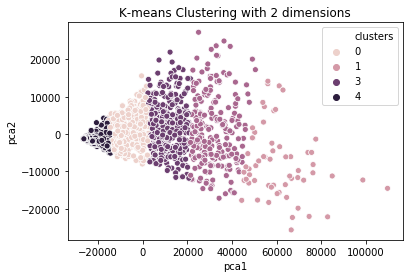

In [395]:
reduced_data = PCA(n_components=2).fit_transform(backup)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=backup['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

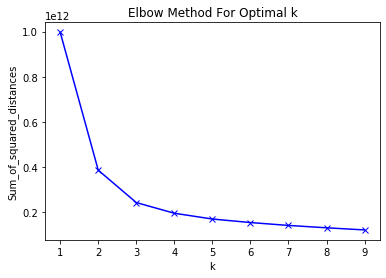

In [396]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [399]:
level_5["clusters"].value_counts()

1    794
4    371
2    305
3    149
0    139
Name: clusters, dtype: int64

In [410]:
final_df = pd.concat([level_5,level_ultimate["ZIP"]], axis = 1)


In [411]:
final_df

,batteryelectric0_20000,dieselanddieselhybrid0_20000,flex-fuel0_20000,gasoline0_20000,hybridgasoline0_20000,naturalgas0_20000,other0_20000,plug-inhybrid0_20000,batteryelectric20000_30000,dieselanddieselhybrid20000_30000,...,HV_150_500,HV_500_1000,HV_1000,RENT_500_1500,RENT_1500_2500,RENT_2500_,EV Level2 EVSE Num,EV DC Fast Count,clusters,ZIP
0,0.0,0.0,153.0,2570.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4255,276,91,7389,1299,50,1.0,0.0,2,90001
1,0.0,0.0,152.0,2242.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3939,215,38,6096,1598,48,2.0,0.0,2,90002
2,0.0,0.0,178.0,2835.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3973,309,29,8872,2699,83,0.0,0.0,0,90003
3,13.0,0.0,31.0,1283.0,0.0,0.0,0.0,0.0,0.0,0.0,...,355,1538,1667,13499,4083,544,0.0,0.0,0,90004
4,0.0,0.0,24.0,456.0,0.0,0.0,0.0,0.0,0.0,0.0,...,171,630,427,12172,2249,408,2.0,0.0,2,90005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,19,0,0,0.0,0.0,1,96119
1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,0,0,0.0,0.0,1,96123
1755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,0,0,6,0,0,0.0,0.0,1,96132
1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,12,0,0,0.0,0.0,1,96133
